In [1]:
import numpy as np

import matplotlib.pyplot as plt
import scipy.linalg
from scipy.optimize import fmin_bfgs

%matplotlib inline

# Задание

Допишите реализацию класса для обучения полиномиальной регресии, то есть по точкам $x_1, x_2, \dots, x_n$ и $y_1, y_2, \dots, y_n$ и заданному числу $d$ решить оптимизационную задачу:

$$ \sum_{i=1}^n (~f(x_i) - y_i~)^2 \min_f,$$ где f – полином степени не выше $d$.

In [2]:
def polynom(params, x, d):
    return sum(p * x**i for p, i in zip(params, range(d+1)))

def func(params, points_x, points_y, d):
    return sum((polynom(params, x, d) - y)**2 for x, y in zip(points_x, points_y))

def predict_poly(params, points_x):
    return [polynom(params, x, len(params)) for x in points_x]

class Funct(object):
    def __init__(self, points_x, points_y, d):
        self.points_x = points_x
        self.points_y = points_y
        self.max_degree = d
        
    def __call__(self, params):
        return func(params, self.points_x, self.points_y, self.max_degree)


class PolynomialRegression(object):
    
    def __init__(self, max_degree=1):
        self.max_degree = max_degree
        
    def fit(self, points_x, points_y):
        f = Funct(points_x, points_y, self.max_degree)
        self.optimal_params = fmin_bfgs(f, np.ones(self.max_degree))
        print("optimal=", self.optimal_params)
        
        return self
    
    def predict(self, points_x):
        return predict_poly(self.optimal_params, points_x)
    

In [3]:
np.random.seed(42)
points_x = np.random.uniform(-10, 10, size=10)
# we use list comprehesion but think about how to write it using np.array operations
points_y = np.array([4 - x + x ** 2 + 0.1 * x ** 3 + np.random.uniform(-20, 20) for x in points_x])

## Точное решение нормального уравнения

In [4]:
def get_normal_mat(points_x, points_y, d):
    X = np.empty(shape=(len(points_x), d+1), dtype=np.float32)
    for i in range(len(points_x)):
        for p in range(d+1):
            X[i][p] = points_x[i]**p;
    return X
                   
def get_optimal_weights(points_x, points_y, d):
    X = get_normal_mat(points_x, points_y, d)
    A = np.dot(X.T, X)
    b = np.dot(X.T, points_y)
    return np.linalg.solve(A, b)

print(get_optimal_weights(np.array([3, 0]), np.array([0, 3]), 1))

[ 3. -1.]


In [5]:
class PolynomialRegressionExact(object):
    
    def __init__(self, max_degree=1):
        self.max_degree = max_degree
        
    def fit(self, points_x, points_y):
        self.optimal_params = get_optimal_weights(points_x, points_y, self.max_degree)
        print("optimal=", self.optimal_params)
        
        return self
    
    def predict(self, points_x):
        return predict_poly(self.optimal_params, points_x)

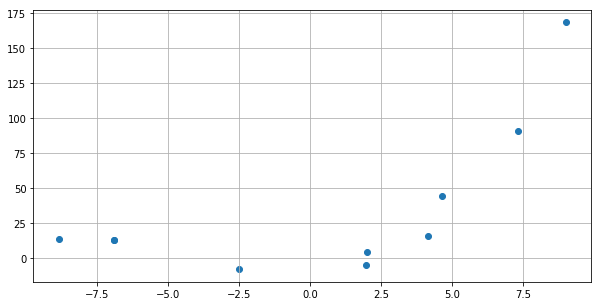

In [6]:
plt.figure(figsize=(10, 5))
plt.scatter(points_x, points_y)
plt.grid()
plt.show()

In [7]:
def plot_model(max_degree, model):
    plt.figure(figsize=(10, 5))
    plt.scatter(points_x, points_y)
    model = model(max_degree).fit(points_x, points_y)
    all_x = np.arange(-10, 10.1, 0.1)
    plt.plot(all_x, model.predict(all_x))
    plt.grid()
    plt.show()

Optimization terminated successfully.
         Current function value: 15650.232585
         Iterations: 9
         Function evaluations: 68
         Gradient evaluations: 17
optimal= [32.77173045  5.64348464]


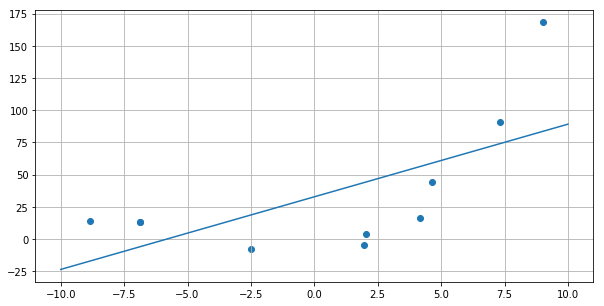

         Current function value: 1581.588136
         Iterations: 10
         Function evaluations: 581
         Gradient evaluations: 114
optimal= [-16.03346749   6.35346013   1.3447768 ]


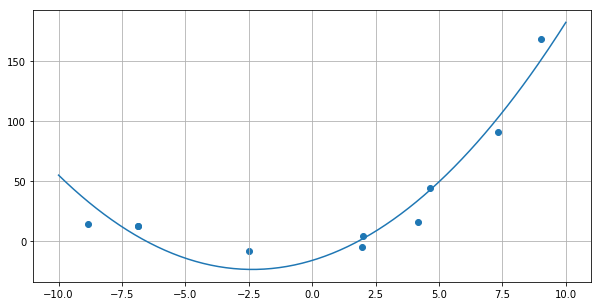

         Current function value: 351.525883
         Iterations: 11
         Function evaluations: 259
         Gradient evaluations: 43
optimal= [-8.72743789  1.16174409  1.21103547  0.08794552]


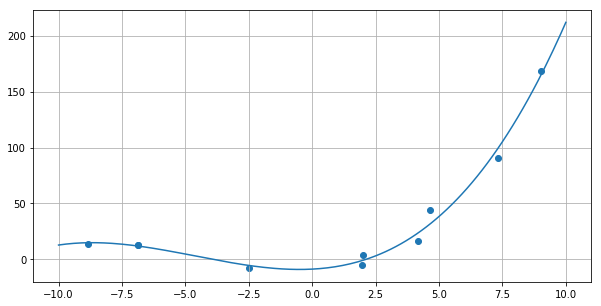

         Current function value: 349.551206
         Iterations: 13
         Function evaluations: 183
         Gradient evaluations: 26
optimal= [-8.08505078e+00  1.15529487e+00  1.14981003e+00  8.78323281e-02
  7.50681834e-04]


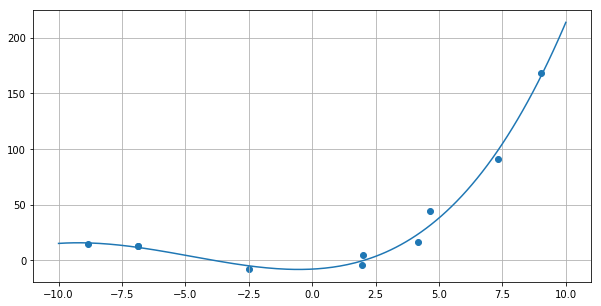

         Current function value: 292.219318
         Iterations: 11
         Function evaluations: 193
         Gradient evaluations: 24
optimal= [-9.40938523e+00  2.92966532e+00  1.15288179e+00  2.45488986e-03
  8.40309189e-04  8.23944836e-04]


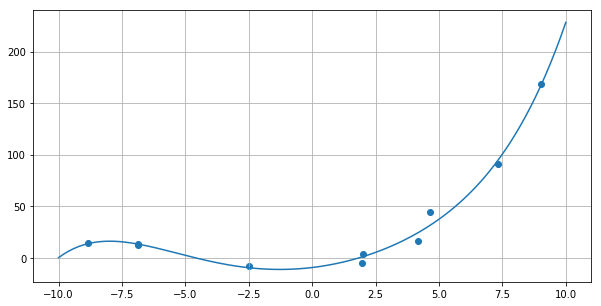

         Current function value: 251.283059
         Iterations: 14
         Function evaluations: 615
         Gradient evaluations: 67
optimal= [-1.36459710e+01  2.23908303e+00  2.05597540e+00  2.25063638e-02
 -2.72097689e-02  6.69903642e-04  2.19510565e-04]


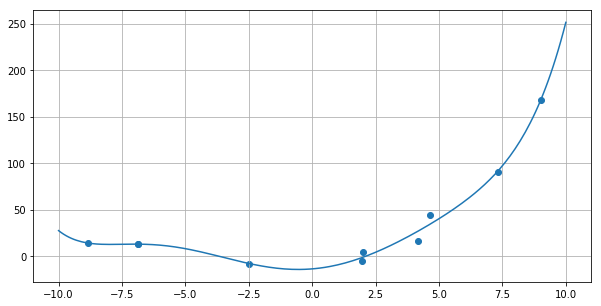

         Current function value: 465.825969
         Iterations: 18
         Function evaluations: 1112
         Gradient evaluations: 110
optimal= [-5.56091773e+01  1.58721286e+01  1.14707163e+01 -2.36422295e+00
 -3.19786425e-01  6.84994074e-02  2.52432365e-03 -5.04420797e-04]


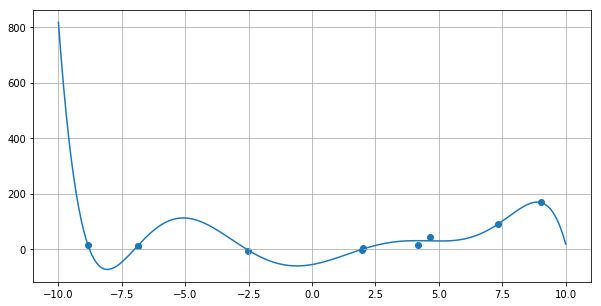

         Current function value: 261547.033040
         Iterations: 23
         Function evaluations: 1431
         Gradient evaluations: 129
optimal= [ 4.81633693e+04 -2.68141280e+04 -6.56670378e+03  5.03583887e+03
 -3.04351499e+02 -1.48116463e+02  1.49936026e+01  1.12892211e+00
 -1.29374434e-01]


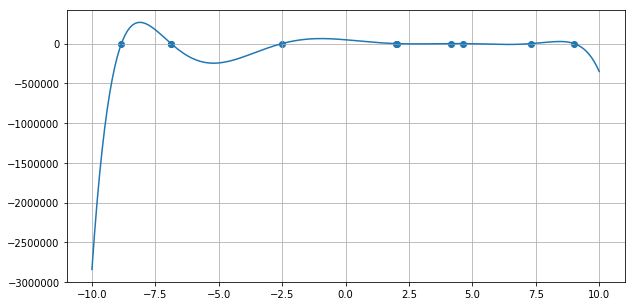

In [8]:
for i in range(2, 10):
    plot_model(i, PolynomialRegression)

Объясните почему графики меняются таким образом

optimal= [-16.03345564   6.35345976   1.3447765 ]


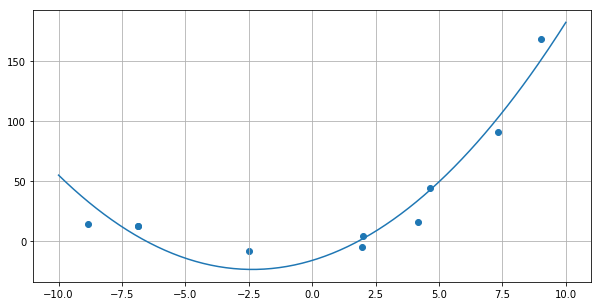

optimal= [-8.72742353  1.16173919  1.21103514  0.08794559]


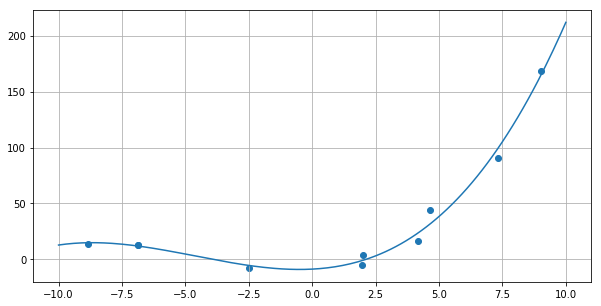

optimal= [-8.08481074e+00  1.15528755e+00  1.14978815e+00  8.78323631e-02
  7.50946217e-04]


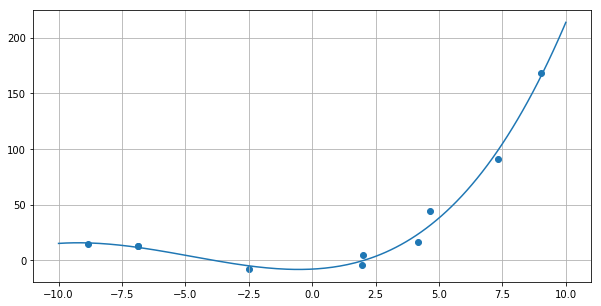

optimal= [-9.41021648e+00  2.93107408e+00  1.15286366e+00  2.38688991e-03
  8.40629725e-04  8.24601034e-04]


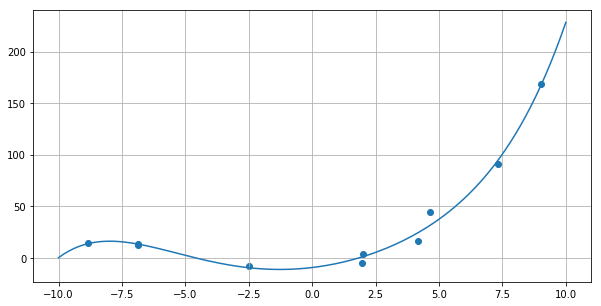

optimal= [-1.37408535e+01  2.22519763e+00  2.07602832e+00  2.28814653e-02
 -2.78331769e-02  6.67159527e-04  2.24393429e-04]


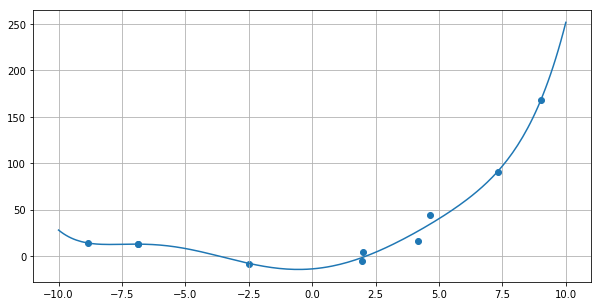

optimal= [ 9.37986820e+01 -3.14662455e+01 -2.07028141e+01  5.75212792e+00
  6.69416644e-01 -1.61399235e-01 -5.22619210e-03  1.20284587e-03]


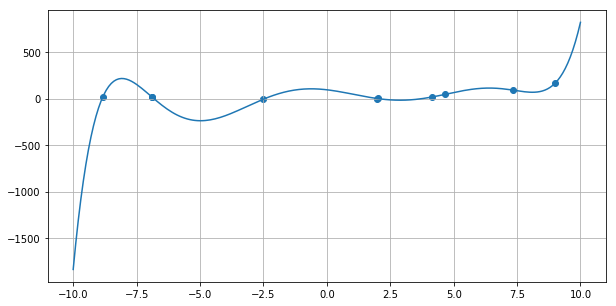

optimal= [ 1.36627281e+01  8.91599425e+00 -8.44978141e+00 -1.73411941e+00
  9.52583563e-01  5.77368731e-02 -2.38703503e-02 -4.62071787e-04
  1.68515004e-04]


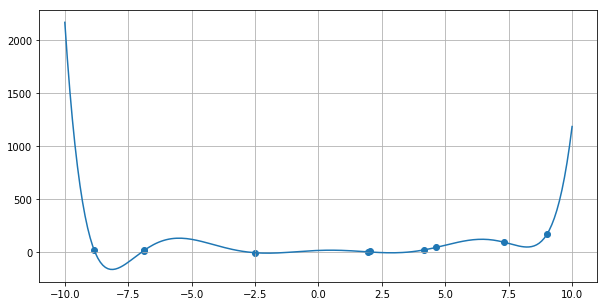

optimal= [ 1.13521007e+02 -4.71140759e+01 -2.01188936e+01  8.25873271e+00
 -8.45771654e-02 -1.58772396e-01  1.95801896e-02 -7.49562033e-04
 -1.96026887e-04  1.96935927e-05]


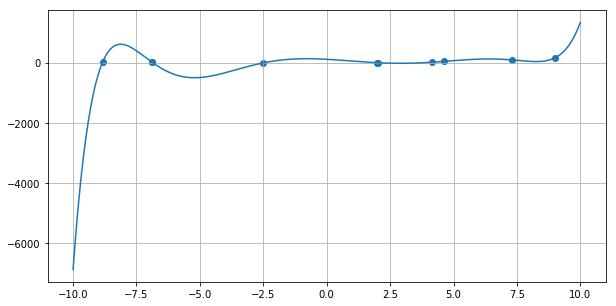

In [9]:
for i in range(2, 10):
    plot_model(i, PolynomialRegressionExact)

**Значение для формы**

In [10]:
print(int(
    PolynomialRegression(7).fit(points_x, points_y).predict([10])[0]
    + PolynomialRegression(1).fit(points_x, points_y).predict([-5])[0]
    + PolynomialRegression(4).fit(points_x, points_y).predict([-15])[0]
))

         Current function value: 251.283059
         Iterations: 14
         Function evaluations: 615
         Gradient evaluations: 67
optimal= [-1.36459710e+01  2.23908303e+00  2.05597540e+00  2.25063638e-02
 -2.72097689e-02  6.69903642e-04  2.19510565e-04]
Optimization terminated successfully.
         Current function value: 27089.597230
         Iterations: 5
         Function evaluations: 21
         Gradient evaluations: 7
optimal= [35.04455202]
         Current function value: 351.525883
         Iterations: 11
         Function evaluations: 259
         Gradient evaluations: 43
optimal= [-8.72743789  1.16174409  1.21103547  0.08794552]
235


In [11]:
print(int(
    PolynomialRegressionExact(7).fit(points_x, points_y).predict([10])[0]
    + PolynomialRegressionExact(1).fit(points_x, points_y).predict([-5])[0]
    + PolynomialRegressionExact(4).fit(points_x, points_y).predict([-15])[0]
))

optimal= [ 9.37986820e+01 -3.14662455e+01 -2.07028141e+01  5.75212792e+00
  6.69416644e-01 -1.61399235e-01 -5.22619210e-03  1.20284587e-03]
optimal= [32.77172744  5.64348457]
optimal= [-8.08481074e+00  1.15528755e+00  1.14978815e+00  8.78323631e-02
  7.50946217e-04]
796
